In [1]:
import pickle as pk
import pandas as pd
import numpy as np
import copy

data=pd.read_csv("./Data/BankChurners.csv")

data['Attrition_Flag'] = data['Attrition_Flag'].map({1: 'Existing Customer', 0: 'Attrited Customer'})


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# # print)str
# scaled_x_train=pd.read_csv("./Data/scaled_x_train_smote2.csv")
# scaled_x_test=pd.read_csv("./Data/scaled_x_test_smote2.csv")
# # pd.read_csv("./Data/scaled_x_test_smote2.csv")
# scaled_x_cv=pd.read_csv("./Data/scaled_x_cv_smote2.csv")

y_test_copy=pd.read_csv("./Data/y_test_smote3.csv")
x_test=pd.read_csv("./Data/x_test_smote3.csv")

X_train_res=pd.read_csv("./Data/X_train_res_smote3.csv")
y_train_res=pd.read_csv("./Data/y_train_res_smote3.csv")

X_train_res=X_train_res.drop('Unnamed: 0',axis=1)
y_train_res=y_train_res.drop('Unnamed: 0',axis=1)
x_test=x_test.drop('Unnamed: 0',axis=1)


y_test_copy=y_test_copy.drop('Unnamed: 0',axis=1)
# scaled_x_test=scaled_x_test.drop('Unnamed: 0',axis=1)
# scaled_x_cv=scaled_x_cv.drop('Unnamed: 0',axis=1)


y_test=y_test_copy

y_valid=pd.read_csv("./Data/y_valid_smote3.csv")
x_valid=pd.read_csv("./Data/x_valid_smote3.csv")

x_valid=x_valid.drop('Unnamed: 0',axis=1)
y_valid=y_valid.drop('Unnamed: 0',axis=1)

y_valid.shape




y_train_res['Attrition_Flag']=y_train_res['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
y_valid['Attrition_Flag']=y_valid['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})
y_test_copy['Attrition_Flag']=y_test_copy['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})



In [3]:
#  Scaling features
scaler = StandardScaler()
scaler.fit(X_train_res)

scaled_x_train = scaler.transform(X_train_res)
scaled_x_test = scaler.transform(x_test)


scaled_x_valid=scaler.transform(x_valid)
# scaled_y_cv =scaler.transform(y_cv)

scaled_x_train.shape


scaled_x_train.shape

(7675, 32)

In [4]:
from sklearn.decomposition import FastICA
ICAFinal = FastICA(n_components=23)
IndependentComponentValues=ICAFinal.fit_transform(scaled_x_train)

In [5]:
icaTestData=ICAFinal.transform(scaled_x_test)
icavalidData=ICAFinal.transform(scaled_x_valid)

In [23]:
icavalidData

array([[ 0.00461802, -0.00551663,  0.0175603 , ..., -0.00377041,
         0.00245851, -0.01310097],
       [ 0.00349665, -0.00186684,  0.00987765, ..., -0.00147589,
         0.00094835, -0.01290331],
       [ 0.00212189,  0.00190269,  0.00980882, ..., -0.0019781 ,
         0.00171047,  0.01188609],
       ...,
       [ 0.00419987, -0.00219551, -0.00524866, ..., -0.00578505,
         0.00392358, -0.01397355],
       [ 0.00102356, -0.00378594, -0.01357186, ..., -0.00527492,
         0.00287264, -0.00038979],
       [ 0.00303201, -0.00540123, -0.00359942, ..., -0.0022023 ,
         0.00166978,  0.01255029]])

In [6]:
# pca_reload = pk.load(open("pca_finalDF_data1.pkl",'rb'))
# result_new = pca_reload .transform(X)

In [7]:
# pca_reload.shape

In [8]:
def create_model(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=input_shape))
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.Dense(8, activation=activation))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model


In [9]:

import joblib

# joblib.dump(DTmodel, 'DTgrid_NLP.pkl')

from sklearn import metrics

# tfidf_vector_X = xtrain_tfidf_ngram.toarray()  #//shape - (3,6)
# tfidf_vector_valid= xvalid_tfidf_ngram.toarray() #//shape - (3,6)
# tfidf_vector_X = tfidf_vector_X[:, :, None] #//shape - (3,6,1) 
# tfidf_vector_valid = tfidf_vector_valid[:, :, None] #//shape - (3,6,1)


# tfidf_vector_X.shape[1:]

from tensorflow import keras
from tensorflow.keras import layers

# input_shape= [x_train.shape[1]]

# NNmodel = create_model(optimizer='adam', activation = 'sigmoid', hidden_layers=1,learning_rate=0.01)




from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold


In [41]:
# sess.run(optimizer._lr)
def create_modelWithDropBatch(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=input_shape))
    for i in range(hidden_layers):
          # Add one hidden layer
#         model.add(layers.BatchNormalization())
#         model.add(layers.Dropout(0.5))
        model.add(layers.Dense(256, activation='relu'))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model



In [25]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [12]:
# pca_finalDF.shape
# input_shape

In [26]:

input_shape=[23]
#
model_Batch_drop_relu =  KerasClassifier(build_fn=create_modelWithDropBatch, verbose = False)  

param_grid={'learning_rate':[0.1,0.001,0.01,0.05,0.05,0.5],'hidden_layers':[2,4,6,8,10]}

gridNN_Batch_drop_relu = GridSearchCV(estimator = model_Batch_drop_relu, param_grid = param_grid)

model_Batch_drop_relu.get_params()

history_Batch_drop_relu = gridNN_Batch_drop_relu.fit(
     IndependentComponentValues, y_train_res,
    validation_data=(icavalidData, y_valid),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)

print(history_Batch_drop_relu.best_params_)

print(history_Batch_drop_relu.best_score_)
# print(grid.best_params_)

{'hidden_layers': 2, 'learning_rate': 0.001}
0.9009772062301635


In [28]:
# jb

In [42]:
import timeit

start = timeit.default_timer()

#Your statements here

bestNNNEW=create_modelWithDropBatch(hidden_layers= 4, learning_rate= 0.001)
historyNEW= bestNNNEW.fit(
     IndependentComponentValues, y_train_res,
    validation_data=(icavalidData, y_valid),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)
stop = timeit.default_timer()

print('Time: ', stop - start)  



Epoch 1/200
15/15 [==============================] - 1s 21ms/step - loss: 0.6510 - accuracy: 0.6618 - val_loss: 0.5090 - val_accuracy: 0.8327
Epoch 2/200
15/15 [==============================] - 0s 10ms/step - loss: 0.6351 - accuracy: 0.6731 - val_loss: 0.5247 - val_accuracy: 0.8327
Epoch 3/200
15/15 [==============================] - 0s 10ms/step - loss: 0.6409 - accuracy: 0.6627 - val_loss: 0.5057 - val_accuracy: 0.8327
Epoch 4/200
15/15 [==============================] - 0s 10ms/step - loss: 0.6457 - accuracy: 0.6565 - val_loss: 0.5453 - val_accuracy: 0.8327
Epoch 5/200
15/15 [==============================] - 0s 9ms/step - loss: 0.6375 - accuracy: 0.6663 - val_loss: 0.5400 - val_accuracy: 0.8327
Epoch 6/200
15/15 [==============================] - 0s 10ms/step - loss: 0.6391 - accuracy: 0.6638 - val_loss: 0.5140 - val_accuracy: 0.8327
Epoch 7/200
15/15 [==============================] - 0s 11ms/step - loss: 0.6375 - accuracy: 0.6659 - val_loss: 0.5032 - val_accuracy: 0.8327
Epoch 8

15/15 [==============================] - 0s 9ms/step - loss: 0.3205 - accuracy: 0.8669 - val_loss: 0.3088 - val_accuracy: 0.8756
Epoch 59/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3197 - accuracy: 0.8707 - val_loss: 0.2869 - val_accuracy: 0.8885
Epoch 60/200
15/15 [==============================] - 0s 8ms/step - loss: 0.3191 - accuracy: 0.8667 - val_loss: 0.3127 - val_accuracy: 0.8717
Epoch 61/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3090 - accuracy: 0.8747 - val_loss: 0.4036 - val_accuracy: 0.8268
Epoch 62/200
15/15 [==============================] - 0s 8ms/step - loss: 0.3186 - accuracy: 0.8678 - val_loss: 0.2920 - val_accuracy: 0.8835
Epoch 63/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3198 - accuracy: 0.8712 - val_loss: 0.3027 - val_accuracy: 0.8771
Epoch 64/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3181 - accuracy: 0.8751 - val_loss: 0.2860 - val_accuracy: 0.8885
Epoch 65/200
15/15 

15/15 [==============================] - 0s 9ms/step - loss: 0.3078 - accuracy: 0.8748 - val_loss: 0.3293 - val_accuracy: 0.8727
Epoch 116/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3098 - accuracy: 0.8692 - val_loss: 0.2904 - val_accuracy: 0.8904
Epoch 117/200
15/15 [==============================] - 0s 10ms/step - loss: 0.2950 - accuracy: 0.8834 - val_loss: 0.3338 - val_accuracy: 0.8682
Epoch 118/200
15/15 [==============================] - 0s 10ms/step - loss: 0.3010 - accuracy: 0.8770 - val_loss: 0.3032 - val_accuracy: 0.8835
Epoch 119/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3202 - accuracy: 0.8702 - val_loss: 0.2855 - val_accuracy: 0.8924
Epoch 120/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3113 - accuracy: 0.8737 - val_loss: 0.2869 - val_accuracy: 0.8894
Epoch 121/200
15/15 [==============================] - 0s 10ms/step - loss: 0.3188 - accuracy: 0.8682 - val_loss: 0.2846 - val_accuracy: 0.8899
Epoch 122/

15/15 [==============================] - 0s 9ms/step - loss: 0.3011 - accuracy: 0.8751 - val_loss: 0.2829 - val_accuracy: 0.8870
Epoch 173/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3034 - accuracy: 0.8755 - val_loss: 0.2831 - val_accuracy: 0.8929
Epoch 174/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3078 - accuracy: 0.8751 - val_loss: 0.2880 - val_accuracy: 0.8885
Epoch 175/200
15/15 [==============================] - 0s 9ms/step - loss: 0.2915 - accuracy: 0.8809 - val_loss: 0.2840 - val_accuracy: 0.8914
Epoch 176/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3056 - accuracy: 0.8711 - val_loss: 0.2825 - val_accuracy: 0.8909
Epoch 177/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3043 - accuracy: 0.8724 - val_loss: 0.3057 - val_accuracy: 0.8810
Epoch 178/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3199 - accuracy: 0.8674 - val_loss: 0.3246 - val_accuracy: 0.8697
Epoch 179/200

In [30]:

def plotconfusionMatrix(modelObj,ytest,xtest):
#     model_DecTreeClass2.fit(X_train_res, y_train_res)
    y_pred_DecTreeClass2 = modelObj.predict_classes(xtest)
    conf_mat2 = metrics.confusion_matrix(ytest, y_pred_DecTreeClass2)
    plt.figure(figsize=(8,6))
    sns.heatmap(conf_mat2,annot=True)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual class")
    plt.show()
    print('Confusion matrix: \n', conf_mat2)
    print('TP: ', conf_mat2[1,1])
    print('TN: ', conf_mat2[0,0])
    print('FP: ', conf_mat2[0,1])
    print('FN: ', conf_mat2[1,0])

def getMetrics(modelObj,xTrain,yTrain,xValid,yValid):
    y_pred_DecTreeClass2 = modelObj.predict_classes(xValid)
    print('Classification report: \n', metrics.classification_report(yValid, y_pred_DecTreeClass2))
    print('Training Accuracy_Score:',metrics.accuracy_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')
    print('Training Precision:',metrics.precision_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')
    print('Training Recall:',metrics.recall_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')
    
    print('Training F1 Score:',metrics.f1_score(yTrain, modelObj.predict_classes(xTrain))*100,'%')

    
    print('Validation Accuracy_Score:',metrics.accuracy_score(yValid, y_pred_DecTreeClass2)*100,'%')
    print('Validation Precision:',metrics.precision_score(yValid, y_pred_DecTreeClass2)*100,'%')
    print('Validation Recall:',metrics.recall_score(yValid, y_pred_DecTreeClass2)*100,'%')
    
    print('Validation F1 Score:',metrics.f1_score(yValid, y_pred_DecTreeClass2)*100,'%')



<AxesSubplot:title={'center':'Accuracy'}>

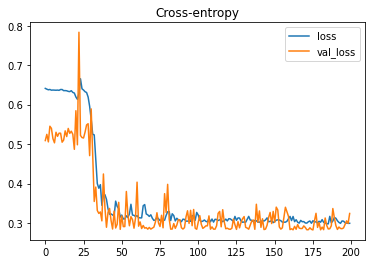

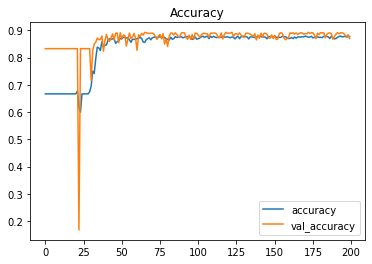

In [43]:
history_df = pd.DataFrame(historyNEW.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")




/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


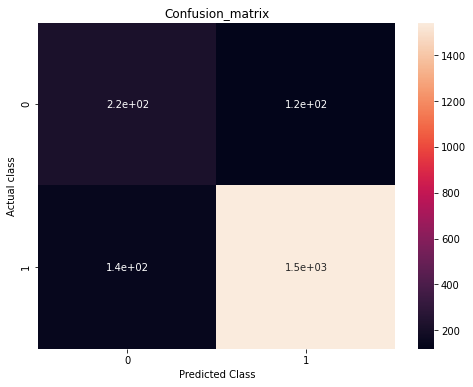

Confusion matrix: 
 [[ 220  119]
 [ 145 1542]]
TP:  1542
TN:  220
FP:  119
FN:  145
Classification report: 
               precision    recall  f1-score   support

           0       0.60      0.65      0.62       339
           1       0.93      0.91      0.92      1687

    accuracy                           0.87      2026
   macro avg       0.77      0.78      0.77      2026
weighted avg       0.87      0.87      0.87      2026



/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training Accuracy_Score: 87.55700325732899 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training Precision: 89.91177598772535 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training Recall: 91.61618135626344 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training F1 Score: 90.75597715613203 %
Validation Accuracy_Score: 86.96939782823297 %
Validation Precision: 92.83564118001205 %
Validation Recall: 91.40486069946651 %
Validation F1 Score: 92.11469534050178 %


In [45]:
plotconfusionMatrix(bestNNNEW,y_valid['Attrition_Flag'],icavalidData)

getMetrics(bestNNNEW,IndependentComponentValues,y_train_res['Attrition_Flag'],icavalidData,y_valid['Attrition_Flag'])